In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/datasets/時価総額上位500社 - シート1.csv')
re_df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/datasets/時価総額上位500社 - シート1.csv')

df.head()

,銘柄コード,会社名,時価総額,PER(会予),PBR,配当利回り(会予),売上高,売上総利益率,営業CF/売上比率,販管費/売上比率,...,棚卸資産,棚卸資産回転数,有形固定資産,固定負債,有利子負債,純有利子負債,純資産,自己資本,フリーCF,研究開発/売上比率
0,2914,本たばこ産業,"7,968,851",17.7,2.1,4.3,"3,149,759",55.3,20.0,46.4,...,"957,281",248.3,"907,700","2,373,398","1,726,788","522,010","3,848,727","3,766,623","479,644",2.5
1,4519,中外製薬,"14,185,201",NaN,7.4,2.9,"1,170,611",71.0,38.2,9.4,...,"233,090",250.7,"448,498","23,832",NaN,"944,550","1,907,222","1,907,222","393,211",15.1
2,6098,リクルートHD,"12,232,612",30.4,6.8,0.3,"3,416,492",57.5,15.7,44.5,...,NaN,NaN,"58,041","338,888","200,746","674,810","1,808,714","1,798,917","465,433",4.5
3,6501,立製作所,"16,814,533",23.7,2.9,NaN,"9,783,370",28.8,12.0,18.9,...,"1,566,282",82.1,"1,341,537","1,345,551","837,298","28,944","6,031,417","5,847,091","780,592",NaN
4,6758,ソニーG,"22,485,988",20.8,2.7,NaN,"11,260,037",28.2,12.2,19.1,...,"1,389,047",62.7,"1,526,777","16,380,543","2,088,195","552,251","8,524,922","8,185,199","749,267",6.6


In [3]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率'],
      dtype='object')

In [4]:
import pandas as pd

# データの読み込み（例: CSVファイルから）
# df = pd.read_csv('your_file.csv')

# すでにDataFrameがあると仮定して、すべての文字列型・object型のカラムでカンマを削除
df = df.applymap(lambda x: str(x).replace(',', '') if isinstance(x, (str)) else x)

# 数値型に変換できるものは自動で変換
df = df.apply(pd.to_numeric, errors='ignore')

# 結果の確認
df.head()


,銘柄コード,会社名,時価総額,PER(会予),PBR,配当利回り(会予),売上高,売上総利益率,営業CF/売上比率,販管費/売上比率,...,棚卸資産,棚卸資産回転数,有形固定資産,固定負債,有利子負債,純有利子負債,純資産,自己資本,フリーCF,研究開発/売上比率
0,2914,本たばこ産業,7968851,17.7,2.1,4.3,3149759.0,55.3,20.0,46.4,...,957281.0,248.3,907700.0,2373398.0,1726788.0,522010.0,3848727.0,3766623.0,479644,2.5
1,4519,中外製薬,14185201,NaN,7.4,2.9,1170611.0,71.0,38.2,9.4,...,233090.0,250.7,448498.0,23832.0,NaN,944550.0,1907222.0,1907222.0,393211,15.1
2,6098,リクルートHD,12232612,30.4,6.8,0.3,3416492.0,57.5,15.7,44.5,...,NaN,NaN,58041.0,338888.0,200746.0,674810.0,1808714.0,1798917.0,465433,4.5
3,6501,立製作所,16814533,23.7,2.9,NaN,9783370.0,28.8,12.0,18.9,...,1566282.0,82.1,1341537.0,1345551.0,837298.0,28944.0,6031417.0,5847091.0,780592,NaN
4,6758,ソニーG,22485988,20.8,2.7,NaN,11260037.0,28.2,12.2,19.1,...,1389047.0,62.7,1526777.0,16380543.0,2088195.0,552251.0,8524922.0,8185199.0,749267,6.6


In [5]:
X = df.drop(columns=['銘柄コード', '会社名'])

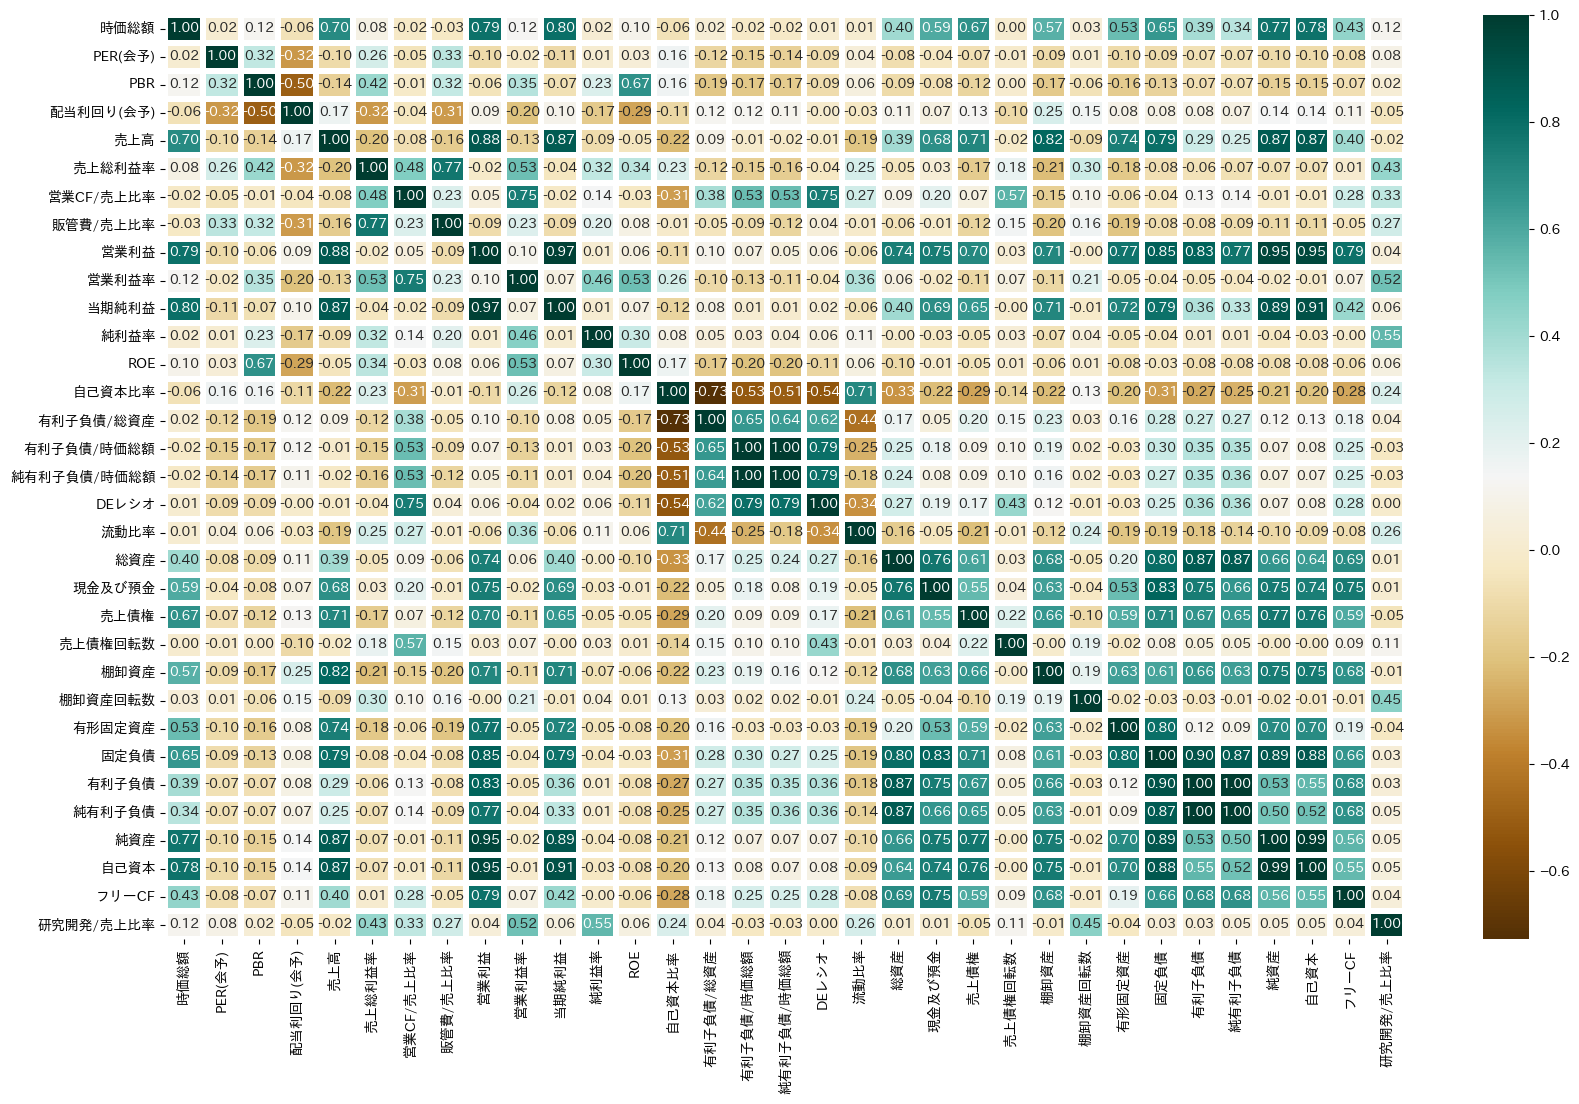

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = X.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [7]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率'],
      dtype='object')

In [8]:
df = df.drop(columns=['配当利回り(会予)', '売上高', '販管費/売上比率', '営業利益', '当期純利益', '純利益率', '売上債権',
                     '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債', '有利子負債', '純資産',
                     '自己資本', 'フリーCF', '研究開発/売上比率', '会社名', '銘柄コード'])

In [9]:
df.dropna(inplace=True)

df.shape

X = df.drop(columns=['PBR'])
y = df['PBR']

## 特徴量の選択

In [10]:
X.columns

Index(['時価総額', 'PER(会予)', '売上総利益率', '営業CF/売上比率', '営業利益率', 'ROE', '自己資本比率',
       '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率', '総資産',
       '現金及び預金', '純有利子負債'],
      dtype='object')

### selectKbest

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SelectKBestでf_regressionを使用
selector = SelectKBest(f_regression, k=4)
X_new = selector.fit_transform(X_train, y_train)

print(selector.get_support())  #選ばれた特徴量

[False  True  True False  True  True False False False False False False
 False False False]


## 学習・予測

In [12]:
real_df = re_df[['PER(会予)', 'ROE','営業利益率', '有利子負債/総資産', 'PBR']]

real_df.dropna(inplace=True)
real_df.shape

/var/folders/7s/_btxhv2n665301n2c0k894mm0000gn/T/ipykernel_2791/3698675417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df.dropna(inplace=True)


(364, 5)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



X = real_df[['PER(会予)', 'ROE','営業利益率', '有利子負債/総資産']]
y = real_df['PBR']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 標準化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

pipe_line = make_pipeline(StandardScaler(), LinearRegression())

r2_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_squared_error')
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
# MSEは負の値で返されるので、符号を変換して表示
print('平均二乗誤差 (MSE): {}'.format(np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipe_line, X, y, cv=5, scoring='neg_mean_absolute_error')
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
# MAEは負の値で返されるので、符号を変換して表示
print('平均絶対誤差 (MAE): {}'.format(np.mean(mae_scores)))

決定係数 (R²) scores: [0.65150813 0.66514007 0.65619952 0.33257747 0.63561327]
平均決定係数 (R²): 0.5882076917690933
平均二乗誤差 (MSE) scores: [-2.04730633 -2.33380716 -0.81561939 -5.09719945 -1.87543328]
平均二乗誤差 (MSE): -2.433873123569137
平均絶対誤差 (MAE) scores: [-0.88005533 -0.82642576 -0.66617757 -1.07862457 -0.847775  ]
平均絶対誤差 (MAE): -0.8598116451019171


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_fit = lr.fit(X_train,y_train)

lr_fit
print('係数:', lr.coef_)
print('切片:', lr.intercept_)

係数: [ 0.78333348  1.52834797  0.1367156  -0.10395639]
切片: 2.0412371134020617


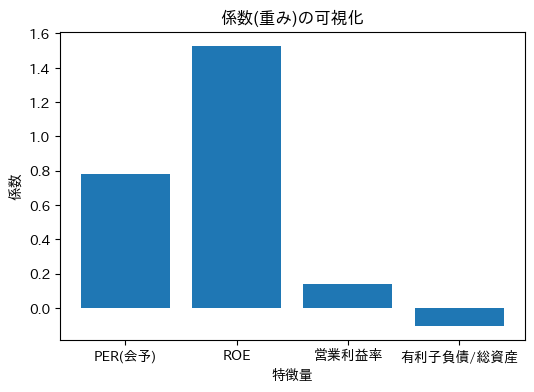

In [16]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# columnsから目的変数を除去
test = real_df.drop(columns=['PBR'])
feature_names = test.columns


coefficients = lr.coef_

plt.figure(figsize=(6, 4))
plt.bar(feature_names, coefficients)
plt.xlabel('特徴量')
plt.ylabel('係数')
plt.title('係数(重み)の可視化')
plt.show()

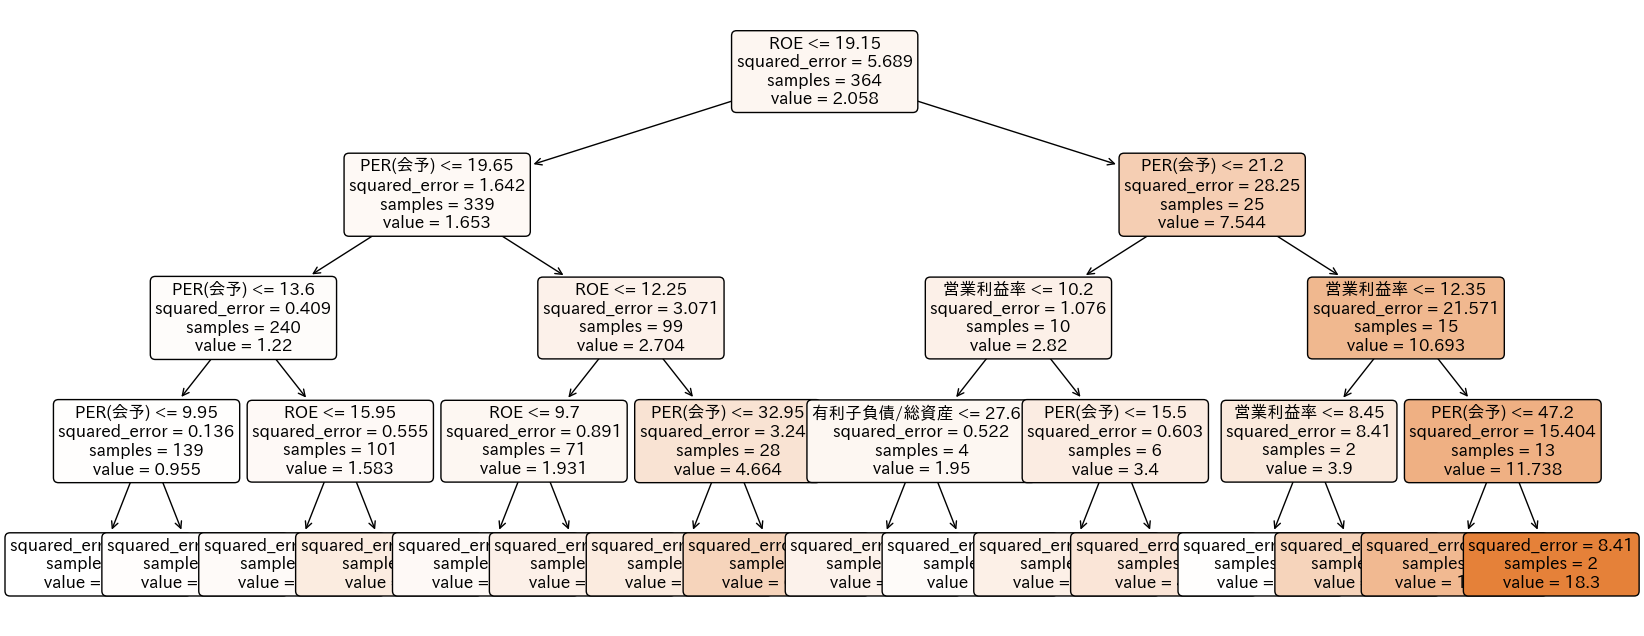

In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# モデル作成と学習
dtree = DecisionTreeRegressor(max_depth=4)
dtree.fit(X, y)

# 回帰木の描画
plt.figure(figsize=(20, 8))  # サイズ調整（横12インチ × 縦8インチなど）
plot_tree(
    dtree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()


In [19]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['明豊ファシリティワークス', 'AREHD', '湖北工業', 'アドバンテッジリスクマネジメント', '相鉄HD', '西武HD', 'ナレルグループ'
                 , '岡村製作所', 'NexTone', '三菱UFJ FG']

# 特徴量データ (PER, ROE, 営業利益率, 有利子負債/総資産)
X_new = np.array([
    [11.9, 14.8, 21.5, 0],      # 明豊ファシリティワークス
    [8.4, 11.3, 3.9, 68],       # AREHD
    [16.9, 13.9, 24.7, 8],      # 湖北工業
    [12.2, 19.03, 11.9, 22.6],   # アドバンテッジリスクマネジメント
    [10.0, 12.3, 12.9, 57.2],   # 相鉄HD
    [21.8, 6.9, 8, 47.4],     # 西武HD
    [8.3, 16.2, 14.4, 25.6],    # ナレルグループ
    [9.2, 11.9, 7.6, 12.4], # オカムラ
    [15.8, 25.22, 5.18, 0], # NexTone
    [12.04, 9.08, 19.6, 64.1], # 三菱UFJ 
])

# 特徴量名 (4つに合わせる)
feature_names = ['PER(会予)', 'ROE', '営業利益率', '有利子負債/総資産']

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = lr_fit.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred

# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
print(result_df)


                会社名  PER(会予)    ROE  営業利益率  有利子負債/総資産     予測PBR
0      明豊ファシリティワークス    11.90  14.80  21.50        0.0  3.028105
1             AREHD     8.40  11.30   3.90       68.0  1.332382
2              湖北工業    16.90  13.90  24.70        8.0  3.076777
3  アドバンテッジリスクマネジメント    12.20  19.03  11.90       22.6  3.796842
4              相鉄HD    10.00  12.30  12.90       57.2  1.860568
5              西武HD    21.80   6.90   8.00       47.4  1.149599
6           ナレルグループ     8.30  16.20  14.40       25.6  2.923417
7             岡村製作所     9.20  11.90   7.60       12.4  1.894691
8           NexTone    15.80  25.22   5.18        0.0  5.519040
9          三菱UFJ FG    12.04   9.08  19.60       64.1  1.248388


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['日水コン', 'インターメスティック', 'ワッツ', 'はてな', 'アイティフォー', 'グリーンズ', 'アサックス',
                 'エリアリンク']

# 特徴量データ (PER, ROE, 営業利益率, 有利子負債/総資産)
X_new = np.array([
    [15.8, 10.5, 9.2, 0],      # 日水コン
    [14.5, 15.2, 11.2, 9.6],       # インターメスティック
    [9.9, 7.1, 2, 12.3],      # ワッツ
    [19.4, 2.3, 2.1, 7.3],   # はてな
    [15, 14.9, 17.2, 0],   # アイティーフォー
    [8.8, 43.8, 12.3, 41.4],     # グリーンズ
    [6.8, 6.9, 69.3, 56.1],    # アサックス
    [16, 11.8, 19.9, 37.3]     # エリアリンク
])

# 特徴量名 (4つに合わせる)
feature_names = ['PER(会予)', 'ROE', '営業利益率', '有利子負債/総資産']

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = lr_fit.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred

# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
print(result_df)


          会社名  PER(会予)   ROE  営業利益率  有利子負債/総資産     予測PBR
0        日水コン     15.8  10.5    9.2        0.0  1.997795
1  インターメスティック     14.5  15.2   11.2        9.6  3.049322
2         ワッツ      9.9   7.1    2.0       12.3  0.677497
3         はてな     19.4   2.3    2.1        7.3  0.040805
4     アイティフォー     15.0  14.9   17.2        0.0  3.149894
5       グリーンズ      8.8  43.8   12.3       41.4  9.545870
6       アサックス      6.8   6.9   69.3       56.1  1.252507
7      エリアリンク     16.0  11.8   19.9       37.3  2.277043


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
# [PER, ROE, 営業利益率, 有利子負債/総資産]

X_new = np.array([
    [12.2, 15, 11.9, 22.6]  
])


X_new_sc = sc.transform(X_new)

lr_pred = lr_fit.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2.81584556])